# Lab 01 - Data exploration and preprocessing

In [1]:
# !pip install pandas 
# !pip install matplotlib
# !pip install seaborn

In [14]:
# import dependencies
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'sklearn'

## Introduction

### Dataset description

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


| Column Name | Data Type | Description | Possible Values |
|-------------|-----------|-------------|----------------|
| PassengerId | Integer   | Unique identifier for each passenger | 1, 2, 3, etc. |
| Survived    | Integer   | Survival indicator | 0 = No (Did not survive), 1 = Yes (Survived) |
| Pclass      | Integer   | Passenger ticket class | 1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower |
| Name        | String    | Full name of the passenger | "Braund, Mr. Owen Harris", etc. |
| Sex         | String    | Gender of the passenger | "male", "female" |
| Age         | Float     | Age of the passenger in years | 22.0, 40.0, etc. (may contain missing values) |
| SibSp       | Integer   | Number of siblings/spouses aboard the Titanic | 0, 1, 2, etc. |
| Parch       | Integer   | Number of parents/children aboard the Titanic | 0, 1, 2, etc. |
| Ticket      | String    | Ticket number | "A/5 21171", "PC 17599", etc. |
| Fare        | Float     | Price paid for the ticket | 7.25, 71.2833, etc. |
| Cabin       | String    | Cabin number | "C85", "E46", etc. (many missing values) |
| Embarked    | String    | Port of embarkation | "C" = Cherbourg, "Q" = Queenstown, "S" = Southampton |

### Objective of the lab

The quality of the data and the amount of useful information that it contains are key factors that determine how well a machine learning algorithm can learn. Therefore, it is absolutely critical that we make sure to examine and preprocess a dataset before we feed it to a learning algorithm. 

In this laboratory we will explore the data exploration and preprocessing pipeline.

#### What is a Dataset?

A data set (or dataset) is a collection of data. In the case of tabular data, a data set corresponds to one or more database tables, where every **column** of a table represents a particular **variable**, and each **row** corresponds to a given **record of the data** set in question. The data set lists values for each of the variables, such as for example height and weight of an object, for each member of the data set. Data sets can also consist of a collection of documents or files

Several characteristics define a data set's structure and properties. These include the number and types of the attributes or variables, and various statistical measures applicable to them.

The values may be numbers, such as real numbers or integers, for example representing a person's height in centimeters, but may also be nominal data (i.e., not consisting of numerical values), for example representing a person's ethnicity. More generally, values may be of any of the kinds described as a level of measurement.

Missing values may exist, which must be indicated somehow.

[Data set - Wikipedia](https://en.wikipedia.org/wiki/Data_set)

#### What are the different types of data?

The two main types of data are:

- Qualitative Data
- Quantitative Data

![types-of-data-img](img\types-of-data-1024x555-1.png)

---

**Qualitative or Categorical Data**
   
Qualitative or Categorical Data is a type of data that can’t be measured or counted in the form of numbers. These types of data are sorted by category, not by number. That’s why it is also known as Categorical Data. 

These data consist of audio, images, symbols, or text. The gender of a person, i.e., male, female, or others, is qualitative data.

Qualitative data tells about the perception of people. This data helps market researchers understand the customers’ tastes and then design their ideas and strategies accordingly. 

The Qualitative data are further classified into two parts :
   
- Nominal Data
    Nominal Data is used to label variables without any order or quantitative value. The color of hair can be considered nominal data, as one color can’t be compared with another color.

    With the help of nominal data, we can’t do any numerical tasks or can’t give any order to sort the data. These data don’t have any meaningful order; their values are distributed into distinct categories.

- Ordinal Data

    Ordinal data have natural ordering where a number is present in some kind of order by their position on the scale. These data are used for observation like customer satisfaction, happiness, etc., but we can’t do any arithmetical tasks on them. 

    Ordinal data is qualitative data for which their values have some kind of relative position. These kinds of data can be considered “in-between” qualitative and quantitative data.

    The ordinal data only shows the sequences and cannot use for statistical analysis. Compared to nominal data, ordinal data have some kind of order that is not present in nominal data. 

--- 

**Quantitative Data**
   
Quantitative data is a type of data that can be expressed in numerical values, making it countable and including statistical data analysis. These kinds of data are also known as Numerical data.

It answers the questions like “how much,” “how many,” and “how often.” For example, the price of a phone, the computer’s ram, the height or weight of a person, etc., falls under quantitative data. 

Quantitative data can be used for statistical manipulation. These data can be represented on a wide variety of graphs and charts, such as bar graphs, histograms, scatter plots, boxplots, pie charts, line graphs, etc.

- Discrete Data

    The term discrete means distinct or separate. The discrete data contain the values that fall under integers or whole numbers. The total number of students in a class is an example of discrete data. These data can’t be broken into decimal or fraction values.

    The discrete data are countable and have finite values; their subdivision is not possible. These data are represented mainly by a bar graph, number line, or frequency table.

- Continuous Data

    Continuous data are in the form of fractional numbers. It can be the version of an android phone, the height of a person, the length of an object, etc. Continuous data represents information that can be divided into smaller levels. The continuous variable can take any value within a range. 

    The key difference between discrete and continuous data is that discrete data contains the integer or whole number. Still, continuous data stores the fractional numbers to record different types of data such as temperature, height, width, time, speed, etc.

[Types Of Data - Great Learning](https://www.mygreatlearning.com/blog/types-of-data/)

## Dataset Loading

To start working with any dataset in Python, we typically use the pandas library, which allows us to load, manipulate, and analyze data easily in tabular form.

---

**What is Pandas?**

Pandas is an open-source software library designed for data manipulation and analysis. It provides data structures like series and DataFrames to easily clean, transform and analyze large datasets and integrates with other Python libraries, such as NumPy and Matplotlib.

It offers functions for data transformation, aggregation and visualization, which are important for analysis.

Pandas revolves around two primary Data structures: Series (1D) for single columns and DataFrame (2D) for tabular data enabling efficient data manipulation.

With pandas, you can perform a wide range of data operations, including

- Reading and writing data from various file formats like CSV, Excel and SQL databases.
- Cleaning and preparing data by handling missing values and filtering entries.
- Merging and joining multiple datasets seamlessly.
- Reshaping data through pivoting and stacking operations.
- Conducting statistical analysis and generating descriptive statistics.
- Visualizing data with integrated plotting capabilities.

[Pandas Tutorial - geeksforgeeks](https://www.geeksforgeeks.org/pandas-tutorial/)

---

In this case, the Titanic dataset is available in a CSV file. We'll load it using <code>[pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)</code>.

For loading file we need Pandas library.

What is Pandas? 

Pandas is one of the most important and widely-used Python libraries in data science, data analysis, and machine learning.

It was created specifically to make working with structured data (like tables and spreadsheets) fast, flexible, and expressive.

The name "pandas" is derived from "Panel Data", which is an econometrics term for multidimensional structured data, and also a fun nod to the panda bear 🐼.

In [ ]:
DATASET_PATH = os.path.join("data", "lab-01", "Titanic-Dataset.csv")

# Load the dataset from the subfolder 'data/lab-01'
df = pd.read_csv(filepath_or_buffer=DATASET_PATH)

# Display the first 5 rows to check it's loaded correctly
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Overview


Now that we’ve successfully loaded the dataset, it’s time to explore and play with it.

Before we start building any machine learning models or visualizations, we must understand:

- What kind of data we are working with

- The distribution of values across key columns

- If there are any unusual or suspicious entries (outliers, wrong types, etc.)

This step is known as Exploratory Data Analysis (EDA) — and it’s one of the most important steps in any data science project.

🔍 Why Is This Step Important?

- ✅ Data Understanding: We need to understand what each column means, what type of values it contains, and how it could relate to the outcome we want to predict (in this case, survival).

- 🚩 Anomaly Detection: This helps us spot outliers, inconsistent data, or wrong data types — all of which can affect the performance of our models.

- 🛠️ Planning Data Cleaning: Based on this step, we can make decisions about missing values, column drops, or transformations needed later.

This step is called Exploratory Data Analysis (EDA), and it’s one of the most critical stages in any data science pipeline.


In [ ]:
# Check the shape of the dataset (rows, columns)
# DataFrame.shape: Return a tuple representing the dimensionality of the DataFrame.

print("Dataset shape:", df.shape)

Dataset shape: (891, 12)


In [ ]:
# Show the column names
# DataFrame.columns: The column labels of the DataFrame.
print("\nColumn names:\n", df.columns.tolist())


Column names:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
# DataFrame.dtype: Return the dtypes in the DataFrame.
# This returns a Series with the data type of each column. 
# The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the object dtype. 
print("Features data types:")
df.dtypes

Features data types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Display information about each column (data type, non-null values, etc.)
# DataFrame.info: Print a concise summary of a DataFrame.
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Explore the unique values of our *target* using the <code>[pandas.unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)</code> module.

In [ ]:
print("Target unique values")
df["Survived"].unique()

Target unique values


array([0, 1])

Exercise: For the columns *Survived, Pclass, Sex, Embarked*, return the list of unique values

In [ ]:
columns = ["Survived", "Pclass", "Sex", "Embarked"]
for col in columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}\n")

Column: Survived
Unique values: [0 1]

Column: Pclass
Unique values: [3 1 2]

Column: Sex
Unique values: ['male' 'female']

Column: Embarked
Unique values: ['S' 'C' 'Q' nan]



In [ ]:
# Summary statistics for numerical columns
# DataFrame.describe: Generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
# Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 
# The output will vary depending on what is provided.

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## Data Quality Check

Before we analyze or build models with our dataset, we need to ensure that the data is clean, complete, and reliable.

Even in well-known datasets like the Titanic dataset, we might encounter:

- Missing values: Empty cells or NaNs that need to be filled, removed, or flagged.

- Inconsistent or incorrect formats: For example, a numerical column with text entries.

- Duplicated entries: Repeated rows that can skew statistics and model results.

- Outliers or unrealistic values: Extremely high or low numbers that don’t make sense (e.g., negative ages).

These issues can significantly affect model accuracy and lead to false conclusions. So, this step focuses on detecting potential problems and planning how to handle them.

In [ ]:
# 1. Check for missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# 2. Optional: Check the percentage of missing values
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

# 3. Check for duplicated rows
print("\nNumber of duplicated rows:")
print(df.duplicated().sum())

# 4. Display rows with invalid or inconsistent data (examples)

# Example: Show rows with missing 'Age'
print("\nRows with missing 'Age':")
print(df[df['Age'].isnull()].head())

# Example: Check for invalid ages (e.g., negative values)
print("\nRows with invalid 'Age' values (if any):")
print(df[df['Age'] < 0])

# Example: Check for unknown 'Sex' values
print("\nUnique values in 'Sex' column:")
print(df['Sex'].unique())

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Number of duplicated rows:
0

Rows with missing 'Age':
    PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN   
26    

## Descriptive Statistics

After we’ve performed a basic overview and quality check, it’s time to understand how the values in our dataset are distributed — both numerical and categorical.

This step is essential because:

- It gives us an idea of the central tendency (e.g., average) and spread (e.g., variability) of data.

- It reveals outliers, data imbalance, and patterns that may not be immediately obvious.

- It helps us decide how to normalize, transform, or encode data before building models.

In [ ]:
# Summary statistics for numeric columns
print("Numeric summary:")
print(df.describe())

# Value counts for categorical features
print("\nValue counts for 'Sex':")
print(df['Sex'].value_counts())

print("\nValue counts for 'Pclass':")
print(df['Pclass'].value_counts())

print("\nValue counts for 'Embarked':")
print(df['Embarked'].value_counts(dropna=False))  # include NaN

Numeric summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Value counts for 'Sex':
Sex
male      577
female    314
Name: c

**Exercise:** Together with the default percentile, return in the output also the 1st and 99th percentile

Check at this link the documentation of the module <code>[DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)</code>

In [ ]:
percentiles = ...
df.describe(percentiles=)

SyntaxError: expected argument value expression (3210384145.py, line 2)

## Basic Data Visualization

After summarizing the dataset using statistics, the next step is to visualize the data. Visualization helps us spot patterns, trends, and anomalies that are hard to detect in raw numbers alone.

These visual tools make data intuitive and accessible, even for those without strong statistical backgrounds.



1. Histogram + KDE

Purpose: Shows how a numerical variable is distributed (e.g., Age).

- A histogram shows how often values appear in a numeric column by splitting them into intervals (“bins”).

- A KDE curve (Kernel Density Estimation) is a smooth line that represents the probability distribution of the data.

Use case:

- Analyze the distribution of Age, Fare, or any continuous variable.

In [4]:
import matplotlib.pyplot as plt

# Set a general style for plots
#plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(8, 5))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black', density=True, alpha=0.6, label='Histogram')


from scipy.stats import gaussian_kde
# gaussian_kde: A class for performing kernel density estimation.
# It is a non-parametric way to estimate the probability density function of a random variable.
# It is a useful tool for visualizing the distribution of data points in a dataset.
kde = gaussian_kde(df['Age'].dropna())
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100)
plt.plot(age_range, kde(age_range), color='red', label='KDE')


plt.title('Distribution of Age with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

2. Boxplot

Purpose: Great for comparing numeric distributions across categories and spotting outliers.

- A boxplot (or whisker plot) summarizes a numeric variable using five key numbers:

  Minimum - 1st quartile (Q1) - Median (Q2) - 3rd quartile (Q3) - Maximum

It also shows outliers (points outside 1.5×IQR).

Use case:

- Compare Age by Survived, Fare by Pclass, etc.

C:\Users\PC1\AppData\Local\Temp\ipykernel_117684\3667786941.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([survived_0, survived_1], labels=['Not Survived (0)', 'Survived (1)'], patch_artist=True,


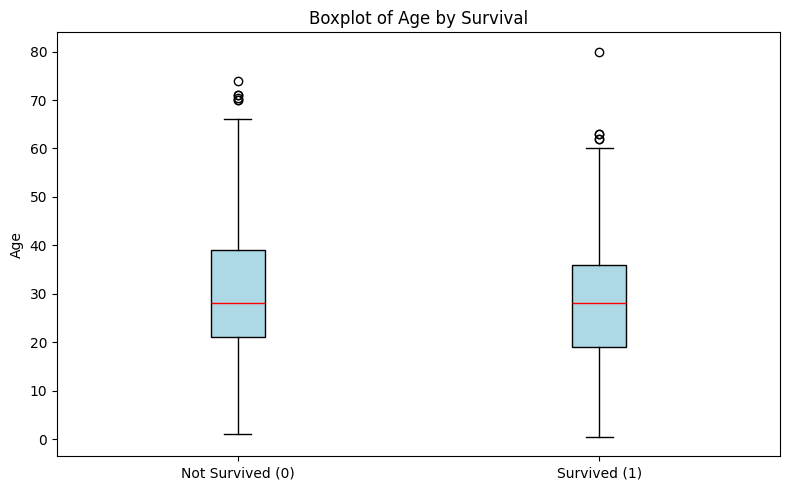

In [ ]:
plt.figure(figsize=(8, 5))
survived_0 = df[df['Survived'] == 0]['Age'].dropna()
survived_1 = df[df['Survived'] == 1]['Age'].dropna()
plt.boxplot([survived_0, survived_1], labels=['Not Survived (0)', 'Survived (1)'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Boxplot of Age by Survival')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


3. Count Plot (Bar Plot for Categories)

Purpose: Displays the frequency of each category in a variable (like value_counts, but visual).

Use case:

- Visualize distributions of:

  Sex - Pclass - Embarked - Survived

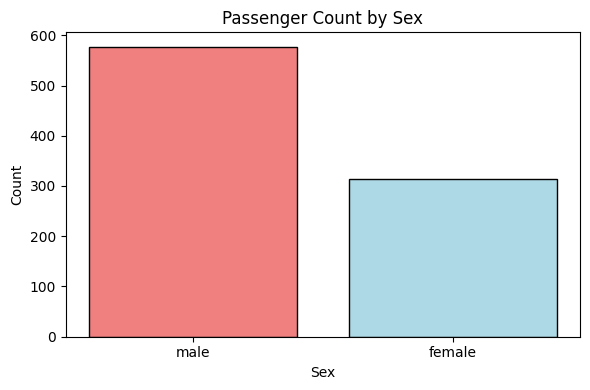

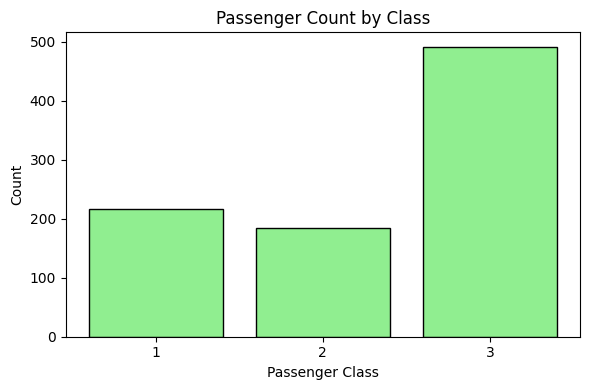

In [ ]:
# Count plot for Sex
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(sex_counts.index, sex_counts.values, color=['lightcoral', 'lightblue'], edgecolor='black')
plt.title('Passenger Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Count plot for Pclass
pclass_counts = df['Pclass'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
plt.bar(pclass_counts.index.astype(str), pclass_counts.values, color='lightgreen', edgecolor='black')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

4. Correlation Heatmap

Purpose: Helps you find numeric features that are positively or negatively correlated.

- Values close to +1 → strong positive correlation

- Values close to -1 → strong negative correlation

Use case:

- See how Age, Fare, Parch, SibSp, and Survived are related.

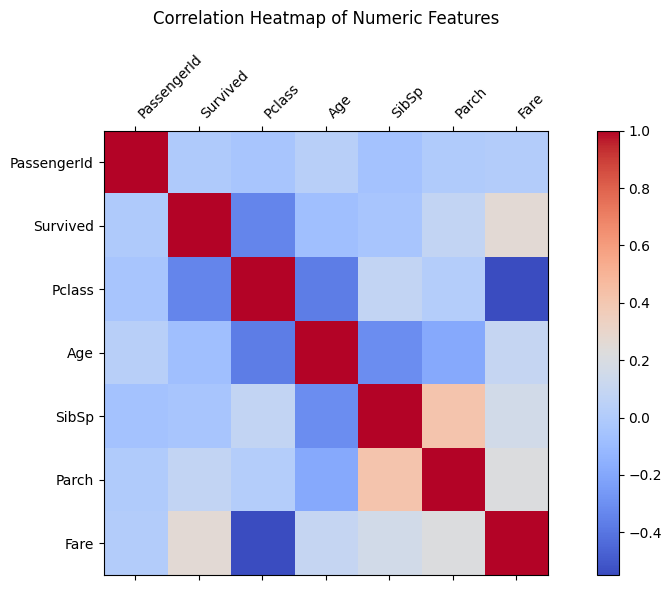

In [ ]:
corr = df.select_dtypes(include=[np.number]).corr()

fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)

# Set axis ticks
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='left')
ax.set_yticklabels(corr.columns)

plt.title('Correlation Heatmap of Numeric Features', pad=20)
plt.tight_layout()
plt.show()

**Exercises**

Compare 3 different columns and their relation between them

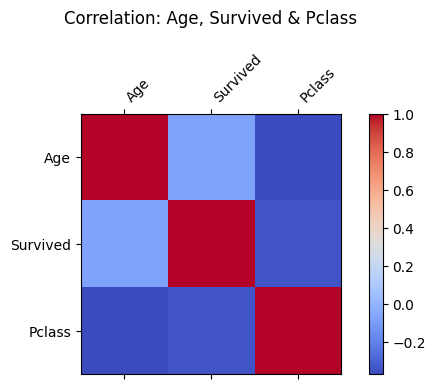

In [5]:
selected_cols = df[['Age', 'Survived', 'Pclass']]

# Compute correlation matrix
corr_selected = selected_cols.corr()

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(corr_selected, cmap='coolwarm')
fig.colorbar(cax)

# Set axis ticks and labels
ax.set_xticks(range(len(corr_selected.columns)))
ax.set_yticks(range(len(corr_selected.columns)))
ax.set_xticklabels(corr_selected.columns, rotation=45, ha='left')
ax.set_yticklabels(corr_selected.columns)

plt.title('Correlation: Age, Survived & Pclass', pad=20)
plt.tight_layout()
plt.show()

## Exploring Feature Relationships

Before performing any advanced analysis or modeling, it is essential to explore and understand the underlying structure of the dataset. One fundamental tool for this process is the <code>groupby</code> function in the pandas library, which allows for the aggregation and summarization of data based on one or more categorical features. By grouping data, we can uncover patterns, compare subsets, and derive meaningful insights that would otherwise remain hidden in raw tables. The following exercises are designed to develop familiarity with <code>groupby</code> operations and demonstrate how systematic data exploration leads to a deeper understanding of trends, distributions, and relationships within the data.

### Grouped statistics

Pandas <code>[DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)</code> function is a powerful tool used to split a DataFrame into groups based on one or more columns, allowing for efficient data analysis and aggregation. It follows a “split-apply-combine” strategy, where data is divided into groups, a function is applied to each group, and the results are combined into a new DataFrame.

The groupby() function in Pandas involves three main steps: Splitting, Applying, and Combining.

- Splitting: This step involves dividing the DataFrame into groups based on some criteria. The groups are defined by unique values in one or more columns.

- Applying: In this step, a function is applied to each group independently. You can apply various functions to each group, such as:
    - Aggregation: Calculate summary statistics (e.g., sum, mean, count) for each group.
    - Transformation: Modify the values within each group.
    - Filtering: Keep or discard groups based on certain conditions.

- Combining: Finally, the results of the applied function are combined into a new DataFrame or Series.

[Pandas DataFrame.groupby() Method - geeksforgeeks](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/)

The abstract definition of grouping is to provide a mapping of labels to group names.
For **DataFrame objects**, a string indicating either a column name or an index level name to be used to group.

#### Grouping by single columns
In this example, we will demonstrate how to group data by a single column using the groupby method. We will group by our categorical features, and explore how their relationship with the target feature

In [ ]:
# Calculate the average survival rate for each sex (female/male)
grouped = df.groupby(by="Sex")
grouped["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

This tells us that 
- 74% of women passengers survived
- 18% of men passengers survived
  
thus we could infer that women were more likely to survive

In [ ]:
# Calculate the average survival rate for each passenger ticket class (1st, 2nd, 3rd)
df.groupby(by="Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

This tells us that
- 62% of passengers in Upper class survived
- 47% of passengers in Middle class survived
- 24% of passengers in Lower class survived

![Titanic cabin assignments through class](img\titanic-figure-one-side-view.png)

[Titanic cabin placement](https://www.encyclopedia-titanica.org/class-gender-titanic-disaster-1912~chapter-2~part-2.html)

​The Titanic disaster highlighted the influence of social class on survival rates. Several factors contributed to this disparity. The ship's design placed first-class accommodations closer to the lifeboats, facilitating quicker access during the evacuation. Additionally, third-class passengers faced physical barriers and lacked clear guidance, which hindered their ability to reach lifeboats in time. These structural and procedural disadvantages underscore how deeply social hierarchies impacted survival outcomes during the tragedy.​

As demonstrated, it is essential to explore data in depth alongside its context, as this approach can uncover meaningful insights into model performance during inference. Understanding the background not only helps interpret results more accurately, but also sheds light on potential biases and patterns that might otherwise go unnoticed. This is particularly crucial when working with historical or real-world datasets, where external factors can significantly influence outcomes.

**Exercises**

Explore the relation between the **port of embarkation** (Embarked) and the survival rate.

In [ ]:
# TODO: df.groupby()[]. ...

If we prefer, we can create a plot for better visualizing our results using matplotlib bar plot

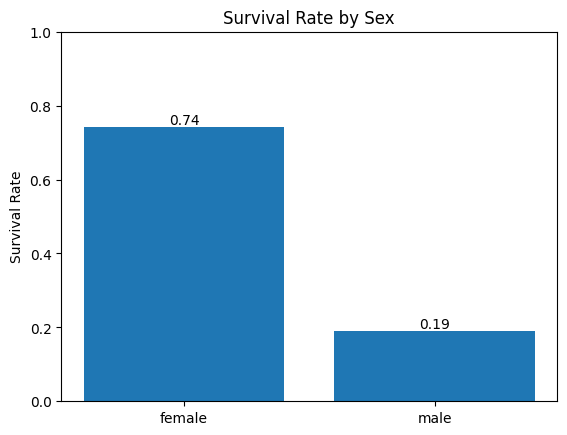

In [ ]:
# Group and calculate survival rates
survival_by_sex = df.groupby("Sex")["Survived"].mean()

# Extract the index and relative values from our grouped data
sex = survival_by_sex.index
rates = survival_by_sex.values

plt.bar(x=sex, height=rates)

# Add values on top of bars
for i, rate in enumerate(rates):
    plt.text(x=i, y=rate, s=f'{rate:.2f}', ha='center', va='bottom', fontsize=10)

plt.ylim(0, 1)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

**Exercise**

Create the plotbar for the average survival rate for each passenger ticket class

In [ ]:
# TODO: 

## Handling Missing Values

It is not uncommon in real-world applications for our samples to be missing one or more values for various reasons. There could have been an error in the data collection process, certain measurements are not applicable, or particular fields could have been simply left blank in a survey, for example. We typically see missing values as the blank spaces in our data table or as placeholder strings such as NaN, which stands for not a number, or NULL (a commonly used indicator of unknown values in relational databases).

Unfortunately, most computational tools are unable to handle such missing values, or produce unpredictable results if we simply ignore them. Therefore, it is crucial that we take care of those missing values before we proceed with further analyses. In this section, we will work through several practical techniques for dealing with missing values by removing entries from our dataset or imputing missing values from other samples and features.

(the material of this section is a reference to *Raschka, S., & Mirjalili, V. (2019). Python machine learning: Machine learning and deep learning with Python, scikit-learn, and TensorFlow 2 (3rd ed.). Packt Publishing.*)


### Eliminating samples or features with missing values

One of the easiest ways to deal with missing data is to simply remove the corresponding features (columns) or samples (rows) from the dataset entirely; rows with missing values can be easily dropped via the dropna method:

In [ ]:
print("Data set shape before dropping rows with missing values:", df.shape)
temp = df.dropna(axis=0)
print("Data shape after dropping rows with missing values:", temp.shape)

Data set shape before dropping rows with missing values: (891, 12)
Data shape after dropping rows with missing values: (183, 12)


Similarly, we can drop columns that have at least one <code>NaN</code> in any row by setting the <code>axis</code> argument to 1:

In [ ]:
print("Data set shape before dropping columns with missing values:", df.shape)
temp = df.dropna(axis=1)
print("Data shape after dropping columns with missing values:", temp.shape)

Data set shape before dropping columns with missing values: (891, 12)
Data shape after dropping columns with missing values: (891, 9)


The dropna method supports several additional parameters that can come in handy:

In [ ]:
# only drop rows where all columns are NaN
df.dropna(how="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# drop rows that have less than 4 real values
df.dropna(thresh=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Although the removal of missing data seems to be a convenient approach, it also comes with certain disadvantages; for example, we may end up removing too many samples, which will make a reliable analysis impossible. Or, if we remove too many feature columns, we will run the risk of losing valuable information that our classifier needs to discriminate between classes.

### Imputing missing values

Often, the removal of samples or dropping of entire feature columns is simply not feasible, because we might lose too much valuable data. In this case, we can use different interpolation techniques to estimate the missing values from the other training samples in our dataset. One of the most common interpolation techniques is **mean imputation**, where we simply replace the missing value with the mean value of the entire feature column. A convenient way to achieve this is by using the [<code>SimpleImputer</code>](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class from **scikit-learn**, as shown in the following code

In [ ]:
# create a simple matrix with missing values
numerical_data = np.array([
    [1, 10, 20, 4],
    [np.nan, 15, np.nan, 2],
    [6, 8, np.nan, np.nan]
])

numerical_data

array([[ 1., 10., 20.,  4.],
       [nan, 15., nan,  2.],
       [ 6.,  8., nan, nan]])

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(numerical_data)
imputed_data = imp_mean.transform(numerical_data)
imputed_data

array([[ 1. , 10. , 20. ,  4. ],
       [ 3.5, 15. , 20. ,  2. ],
       [ 6. ,  8. , 20. ,  3. ]])

Here, we replaced each <code>np.nan</code> value with the corresponding mean, which is separately calculated for each feature column.

Other options for the strategy parameter are <code>median</code> or <code>most_frequent</code>, where the latter replaces the missing values with the most frequent values. This is useful for imputing categorical feature values

In [ ]:
categorical_data = np.array([
    ["red", "tall", "fast"],
    ["brown", np.nan, "slow"],
    [np.nan, "small", "slow"],
    ["brown", "tall", np.nan],
], dtype=object)

categorical_data

array([['red', 'tall', 'fast'],
       ['brown', nan, 'slow'],
       [nan, 'small', 'slow'],
       ['brown', 'tall', nan]], dtype=object)

In [ ]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imputed_data = imp_most_frequent.fit_transform(categorical_data)
imputed_data

array([['red', 'tall', 'fast'],
       ['brown', 'tall', 'slow'],
       ['brown', 'small', 'slow'],
       ['brown', 'tall', 'slow']], dtype=object)

**Exercise**

Impute the missing values in the <code>Cabin</code> column using the <code>constant</code> as the imputation strategy and <code>fill_value</code> as *missing*.

In [ ]:
# extract Age data
cabin = df["Cabin"].values

# Create imputer instance
imp_median = SimpleImputer(strategy=, fill_value=)

# Apply imputing technique
imputed_cabin = 

imputed_cabin

SyntaxError: expected argument value expression (201333596.py, line 5)

## Feature Engineering

Feature Engineering is the process of creating new input features or transforming existing ones to improve the performance of machine learning models. In real-world data, raw columns are often incomplete, noisy, or not directly usable. Good features can make simple models powerful — and poor features can make even the best models fail.

Even if you use powerful algorithms like Random Forest, XGBoost, or Neural Networks, poor features can ruin your model’s performance.

On the other hand, well-crafted features can help:

- Improve accuracy

- Reduce overfitting

- Speed up training

- Make the model easier to interpret

Types of Feature Engineering

| Column Name              | Data Type                   | Description                                                             | Possible Values / Examples                             |
|--------------------------|------------------------------|-------------------------------------------------------------------------|--------------------------------------------------------|
| Feature Extraction       | String → Categorical         | Extract useful parts from complex fields                               | From `Name` → `Title` = "Mr", "Mrs", "Miss", etc.     |
| Feature Transformation   | Numeric                      | Apply mathematical or rule-based transformation to values              | `Fare` → log(Fare), `Age` → square root(Age)           |
| Encoding Categorical     | Categorical → Numeric        | Convert string labels into numeric format for modeling                 | `Sex` = "male", "female" → 1, 0 using `get_dummies()`  |
| Binning                  | Numeric → Categorical        | Divide continuous values into discrete intervals                       | `Age` → "Child", "Adult", "Senior"                     |
| Feature Interaction      | Multiple Columns             | Combine two or more columns to create meaningful relationships         | `FamilySize` = `SibSp` + `Parch` + 1                   |
| Datetime Decomposition   | Datetime → Numeric/Categorical | Break down datetime into parts like year, month, day, etc.            | `2023-04-19` → year = 2023, month = 4                  |
| Scaling / Normalization  | Numeric                      | Scale numeric values to a common range or distribution                 | `Fare` → 0–1 using MinMaxScaler                        |
| Missing Value Imputation | Any                          | Fill missing values with mean, median, mode, or prediction             | `Age` → fill missing with median age (e.g., 28.0)      |


Creating new feature as a Title. Titles often capture social status, gender, and age group — all useful predictors of survival!

In [15]:
# Extract title from passenger name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# View unique titles
print("Unique titles found:", df['Title'].unique())


Unique titles found: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


Encoding Categorical Variables (Sex)

- Most machine learning models can’t handle text labels like 'male' or 'female'. get_dummies() turns these into numerical values (0 or 1) that models can understand.

In [16]:
# Encode 'Sex' column into binary variables (0 or 1)
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Shows new encoded column (e.g., Sex_male)
print(df_encoded[['Sex_male']].head())

   Sex_male
0      True
1     False
2     False
3     False
4      True


Normalize a Numeric Attribute (Fare)

- Normalization rescales the feature so it falls between 0 and 1. This is important for models that are sensitive to feature scale, such as:

- - K-Nearest Neighbors

- - Logistic Regression

- - Neural Networks



In [17]:
# Initialize scaler
scaler = MinMaxScaler()

# Apply normalization on Fare
df_encoded['Fare_normalized'] = scaler.fit_transform(df_encoded[['Fare']])

# Compare original vs normalized
print(df_encoded[['Fare', 'Fare_normalized']].head())

NameError: name 'MinMaxScaler' is not defined

## Final Summary

At this point in the lab, you've:

- Explored the Titanic dataset in depth

- Identified and handled common data quality issues

- Visualized key distributions and feature relationships

- Created new, meaningful features

- Prepared the data for the next step: modeling

The Final Summary serves as a quick review of what your dataset looks like after preprocessing and what insights you've discovered. This is also a sanity check to ensure the data is clean, consistent, and ready for machine learning models.

### Key Objectives for Final Summary

1.Display the final shape and structure of the dataset
→ Are there the expected number of rows and columns?

2.Print the updated column list
→ What features do we now have after feature engineering?

3.Verify there are no more missing or duplicate values
→ A final cleanup check

4.Summarize important observations or decisions made during EDA and preprocessing

In [19]:
print("Final shape of the dataset:")
print(df.shape)

print("\nFinal column list:")
print(df.columns.tolist())

# Final check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Final check for duplicated rows
print("\nNumber of duplicated rows:")
print(df.duplicated().sum())

# Overview of dtypes (check if types look correct)
print("\nData types of final columns:")
print(df.dtypes)

# Quick preview of the cleaned and engineered dataset
print("\nFinal preview of the dataset:")
print(df.head())


Final shape of the dataset:
(891, 13)

Final column list:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Number of duplicated rows:
0

Data types of final columns:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

Final preview of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3  

# Key Insights from the Titanic Dataset

You can include some of the following example reflections:

- The Survival rate was higher among females and 1st-class passengers

- Features like Sex, Pclass, and Title seem to be strong indicators of survival

- We created new features like Title and FamilySize to enrich the dataset

- We handled missing values in Age and dropped columns like Cabin due to excessive missingness

- The dataset is now cleaned, encoded, and normalized — ready for modeling!